In [1]:
!pip install qiskit

In [2]:
!pip install qiskit_aer

In [3]:
!pip install pylatexenc

# Imports

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from pylatexenc import *

# Define Oracle

In [5]:
def deutsch_Josza_oracle(circuit, function_type, n):
    
    # constant: output always 0
    # do nothing
    if function_type == 0:  
        pass

    # constant: output always 1
    # flip last qubit
    elif function_type == 1:  
        circuit.x(n-1)

    # balanced
    # apply cnot for each qubit in the first n-1 qubit, with the last qubit as the target
    elif function_type == 2:
        for i in range(n - 1):  
            circuit.cx(i, n - 1) 

    # balanced
    elif function_type == 3:
        # Apply X gates before CNOTs on all input qubits
        for i in range(n - 1):
            circuit.x(i)
        
        # Apply CNOTs from each input qubit to the output qubit
        for i in range(n - 1):
            circuit.cx(i, n - 1)
        
        # Apply X gates again after CNOTs on all input qubits
        for i in range(n - 1):
            circuit.x(i) 

# Deutsch-Jozsa Algorithm

In [6]:
def deutsch_Josza_algorithm(function_type, n):
    
    # Create circuit with n qubits and n-1 classical bits to measure input qubits
    circuit = QuantumCircuit(n, n - 1)

    # Initialize output qubit to |1>
    circuit.x(n - 1)
    circuit.h(n - 1)

    # Apply Hadamard gates to input qubits
    for i in range(n - 1):
        circuit.h(i)

    # Apply oracle
    deutsch_Josza_oracle(circuit, function_type, n)
        
    # Apply Hadamard gates to input qubits
    for i in range(n - 1):
        circuit.h(i)

    # Measure input qubits
    for i in range(n - 1):
        circuit.measure(i, i)

    return circuit

# Simulation


Function Type: 3
Results: {'111': 1024}


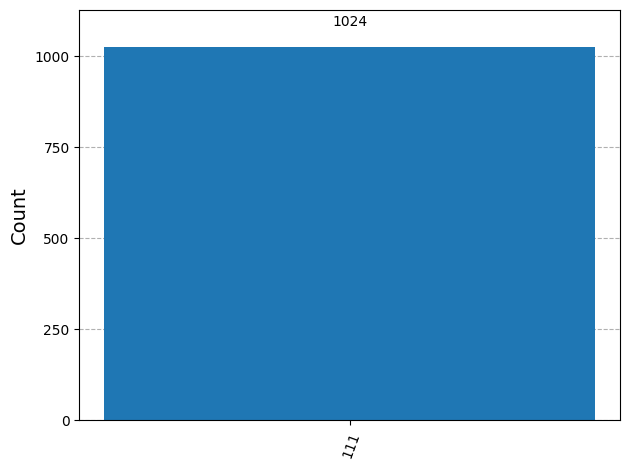

In [7]:
function_type = 3
n=4

# create the quantum circuit
qc = deutsch_Josza_algorithm(function_type,n)

# simulation
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts()
fig = qc.draw(output='mpl')
fig.savefig("deutsch_Josza_circuit"+str(function_type)+".png")

# display the results
print("\nFunction Type:", function_type)
print("Results:", counts)
plot_histogram(counts)